# Package imports

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Loading dataset

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
columns = [x.lower() for x in boston.feature_names]
df = pd.DataFrame(boston.data, columns = columns)
df['price'] = boston.target
description = boston.DESCR

In [5]:
print(description)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# EDA

In [6]:
df.corr().style.background_gradient()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1,-0.199458,0.404471,-0.0552953,0.417521,-0.21994,0.350784,-0.377904,0.622029,0.579564,0.28825,-0.377365,0.45222,-0.385832
zn,-0.199458,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
indus,0.404471,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
chas,-0.0552953,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
nox,0.417521,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.21994,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
age,0.350784,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.377904,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.622029,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.579564,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


[]

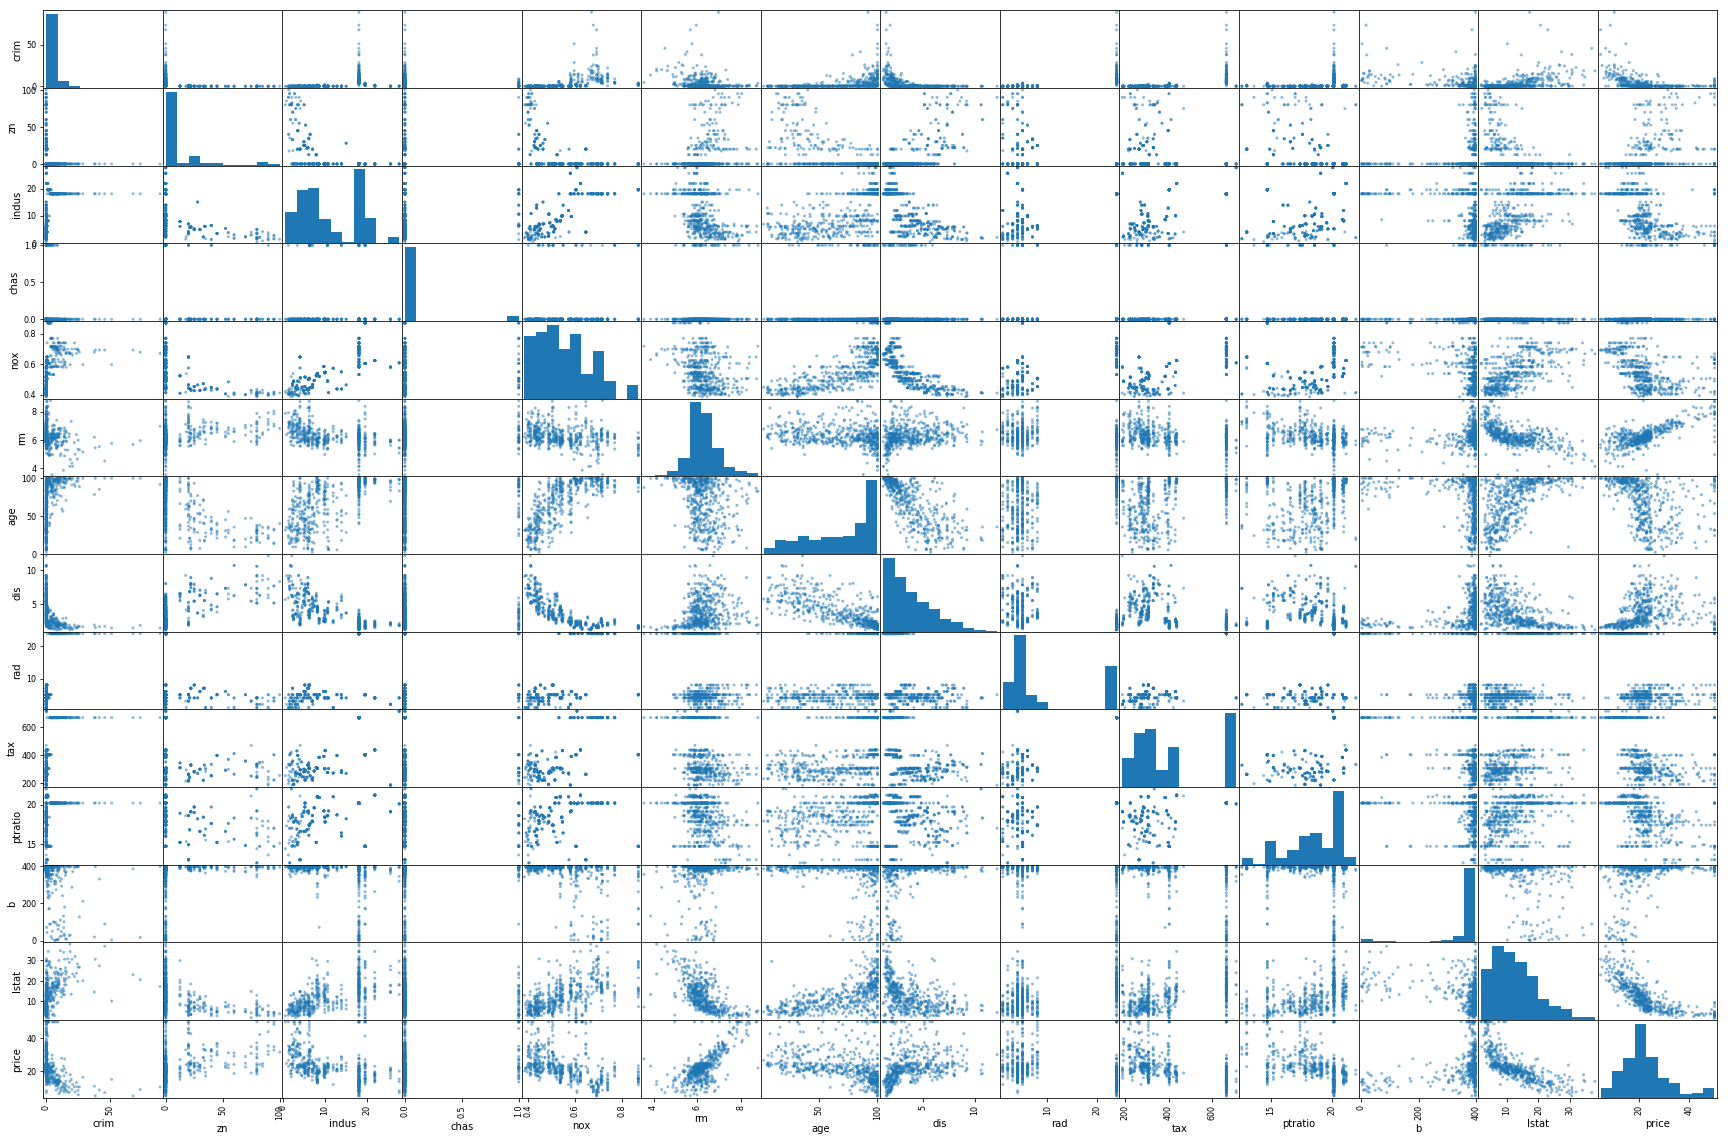

In [7]:
scatter_matrix(df, figsize = (30, 20))
plt.plot()

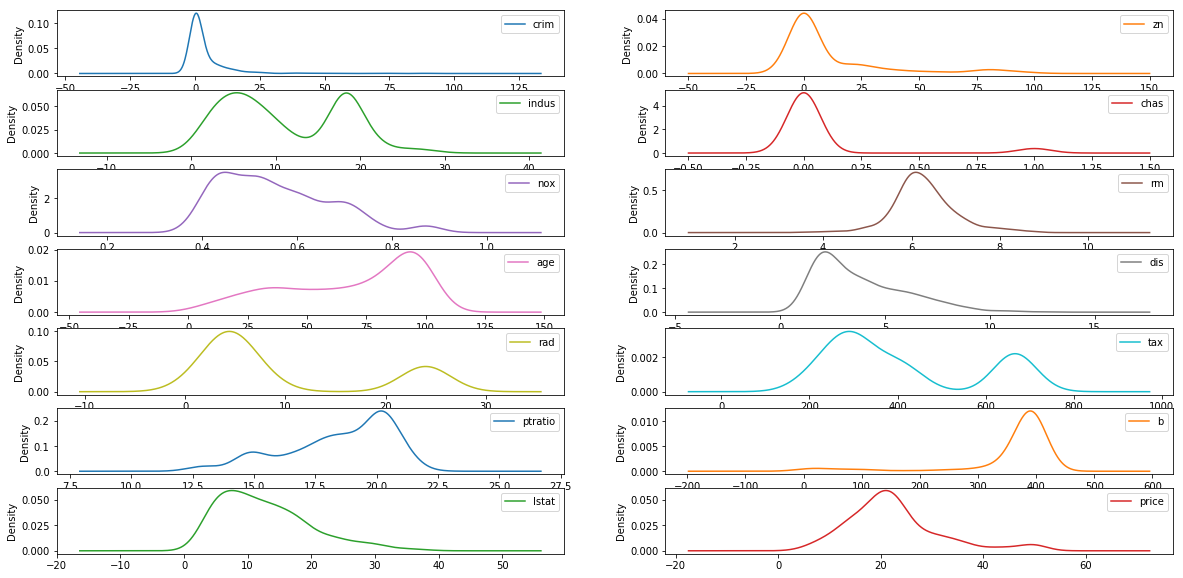

In [8]:
df.plot(kind='density',  figsize = (20, 10), layout = (7, 2), subplots = True, sharex = False)
plt.show()

# Model building

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis = 1), df.price, test_size = 0.2, random_state = 123)

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('Estimated intercept coefficient: {intercept}'.format(intercept = lm.intercept_))
print('Number of coefficients: {count}'.format(count = len(lm.coef_)))

Estimated intercept coefficient: 31.876749184481973
Number of coefficients: 13


In [13]:
pd.DataFrame(list(zip(df.columns[:-1], lm.coef_)), columns = ['feature', 'coefficients']) \
.append(pd.Series({'feature': 'intercept',
                                   'coefficients': lm.intercept_}), ignore_index = True)

,feature,coefficients
0,crim,-0.097513
1,zn,0.047467
2,indus,0.067363
3,chas,1.272212
4,nox,-15.504795
5,rm,4.313804
6,age,-0.000913
7,dis,-1.366013
8,rad,0.283940
9,tax,-0.012749


In [14]:
test_predictions = lm.predict(x_test)

# Validation

In [15]:
test_mse = mean_squared_error(y_test, test_predictions, sample_weight = None)
train_mse = mean_squared_error(y_train, lm.predict(x_train), sample_weight = None)
r2 = r2_score(y_test, test_predictions, sample_weight = None)
print('The training MSE is: {mse}'.format(mse = train_mse))
print('The testing MSE is: {mse}'.format(mse = test_mse))
print('The r-squared is: {r2}'.format(r2 = r2))

The training MSE is: 20.68420474732394
The testing MSE is: 28.17778224612901
The r-squared is: 0.659424367577133


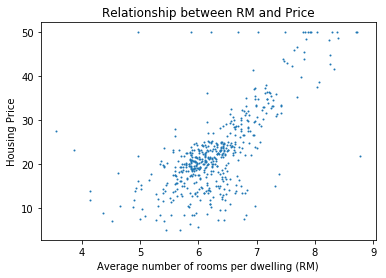

In [16]:
plt.scatter(df.rm, df.price, s = 1)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

Text(0.5,1,'$Y_i$ vs $\\hat{Y}_i$')

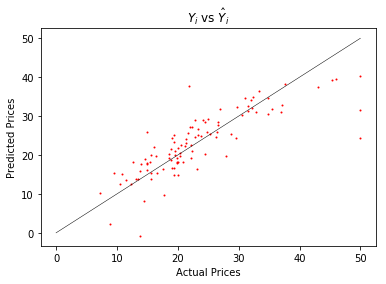

In [17]:
plt.scatter(y_test, test_predictions, s = 1, c = 'r')
plt.plot(np.linspace(0, 50), np.linspace(0, 50), c = 'black', linewidth = 0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('$Y_i$ vs $\hat{Y}_i$')

Text(0,0.5,'Residuals')

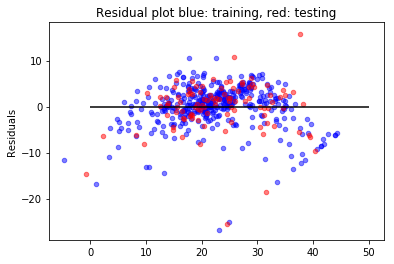

In [18]:
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c = 'b', s = 20, alpha = 0.5)
plt.scatter(test_predictions, test_predictions - y_test, c = 'r', s = 20, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual plot blue: training, red: testing')
plt.ylabel('Residuals')

# Data Standardization

In [19]:
scaler = StandardScaler()
scaler.fit(df.drop('price', axis = 1))
df_std = pd.DataFrame(scaler.transform(df.drop('price', axis = 1)), columns = columns)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_std, df.price, test_size = 0.2, random_state = 123)

In [21]:
lm_std = LinearRegression()
lm_std.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
pd.DataFrame(list(zip(df.columns[:-1], lm_std.coef_)), columns = ['feature', 'standardized_coefficients']) \
.append(pd.Series({'feature': 'intercept',
                                   'standardized_coefficients': lm.intercept_}), ignore_index = True)

,feature,standardized_coefficients
0,crim,-0.837467
1,zn,1.105959
2,indus,0.461675
3,chas,0.322815
4,nox,-1.794883
5,rm,3.027956
6,age,-0.025677
7,dis,-2.873583
8,rad,2.469899
9,tax,-2.146622


Standardized coefficients represent the mean change in the response given a one standard deviation change in the predictor

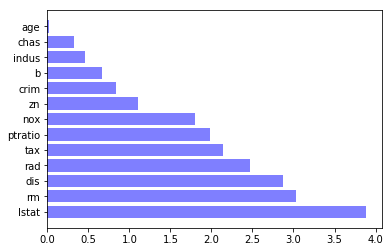

In [23]:
std_features = pd.DataFrame(list(zip(df.columns[:-1], abs(lm_std.coef_))), columns = ['feature', 'standardized_coefficients']) \
                              .sort_values('standardized_coefficients', ascending = False)

plt.barh(range(len(std_features)), std_features.standardized_coefficients,
        align = 'center',
        color = 'blue',
       alpha = 0.5)
plt.yticks(range(len(std_features)), std_features.feature)
plt.show()

# Dropping Features

In [29]:
df_cut = df.drop('age', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(df_cut.drop('price', axis = 1), df.price, test_size = 0.2, random_state = 123)

In [30]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print('Estimated intercept coefficient: {intercept}'.format(intercept = lm.intercept_))
print('Number of coefficients: {count}'.format(count = len(lm.coef_)))

Estimated intercept coefficient: 31.910574681633115
Number of coefficients: 12


In [32]:
pd.DataFrame(list(zip(df.columns[:-1], lm.coef_)), columns = ['feature', 'coefficients']) \
.append(pd.Series({'feature': 'intercept',
                                   'coefficients': lm.intercept_}), ignore_index = True)

,feature,coefficients
0,crim,-0.097485
1,zn,0.047567
2,indus,0.067390
3,chas,1.269471
4,nox,-15.579360
5,rm,4.308081
6,age,-1.362038
7,dis,0.284298
8,rad,-0.012760
9,tax,-0.915208


In [33]:
test_predictions = lm.predict(x_test)

In [34]:
test_mse = mean_squared_error(y_test, test_predictions, sample_weight = None)
train_mse = mean_squared_error(y_train, lm.predict(x_train), sample_weight = None)
r2 = r2_score(y_test, test_predictions, sample_weight = None)
print('The training MSE is: {mse}'.format(mse = train_mse))
print('The testing MSE is: {mse}'.format(mse = test_mse))
print('The r-squared is: {r2}'.format(r2 = r2))

The training MSE is: 20.684413795165952
The testing MSE is: 28.173891735290272
The r-squared is: 0.659471390908415
